# Отчёт

## Оборудование
CPU: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz

RAM: DDR4

## Данные
Для измерений использовались графы LUBM300, LUBM500, LUBM1M, LUBM1.5M, LUBM1.9M и все соответствующие им запросы

## Результаты
Измерения для каждого запроса повторялись по 5 раз

В файле `raw.csv` находятся результаты всех измерений:
- `time_int_adj` - время пересечения и построения матрицы смежности
- `(sqr|adj)_time` - время построения замыкания
- `(sqr|adj)_pairs_time` - время получения пар
- `(sqr|adj)_pairs` - количество достиживых пар)

Диаграммы ниже представлены для демострации отличий между двумя методами построения транзитивного замыкания для каждого из имеющихся типов запросов

In [1]:
import pandas
import seaborn
from matplotlib import pyplot

In [2]:
base_data = pandas.read_csv('raw.csv')
base_data['request'] = base_data['request'].apply(lambda x: x.split('/')[0])
base_data.head(2)

,graph,request,time_int_adj,sqr_time,sqr_pairs_time,sqr_pairs,adj_time,adj_pairs_time,adj_pairs
0,LUBM1.9M,q_15,4195870308,750047313,446585240,4904900,772077050,445630406,4904900
1,LUBM1.9M,q_15,4123475905,752027690,456289922,4904900,768077880,485058993,4904900


In [3]:
def key(x):
    if x[1] == '_':
        return int(x[2:]) * 10
    elif len(x) == 2:
        return int(x[1]) * 10
    else:
        xs = x[1:].split('_')
        return int(xs[0]) * 10 + int(xs[1])

order = sorted(base_data['request'].unique(), key=key)

In [4]:
closing_data = pandas.DataFrame(columns=['graph', 'request', 'type', 'time'])
for _, row in base_data.iterrows():
    closing_data = closing_data.append({
        'graph': row['graph'],
        'request': row['request'],
        'type': 'With square',
        'time': row['sqr_time'],        
    }, ignore_index=True)
    closing_data = closing_data.append({
        'graph': row['graph'],
        'request': row['request'],
        'type': 'With adjacency matrix',
        'time': row['adj_time'],
    }, ignore_index=True)
closing_data.head(2)

,graph,request,type,time
0,LUBM1.9M,q_15,With square,750047313
1,LUBM1.9M,q_15,With adjacency matrix,772077050


In [11]:
def plot(graph):
    fig, ax= pyplot.subplots(figsize=(18, 10))
    
    ax.set_yscale('log')

    g = seaborn.boxplot(x='request', y='time', hue='type', order = order, data=closing_data[closing_data.graph == graph], ax=ax)
    g.set(xlabel='Query type', ylabel='Closure building time (ns)')
    g.set_title(graph)

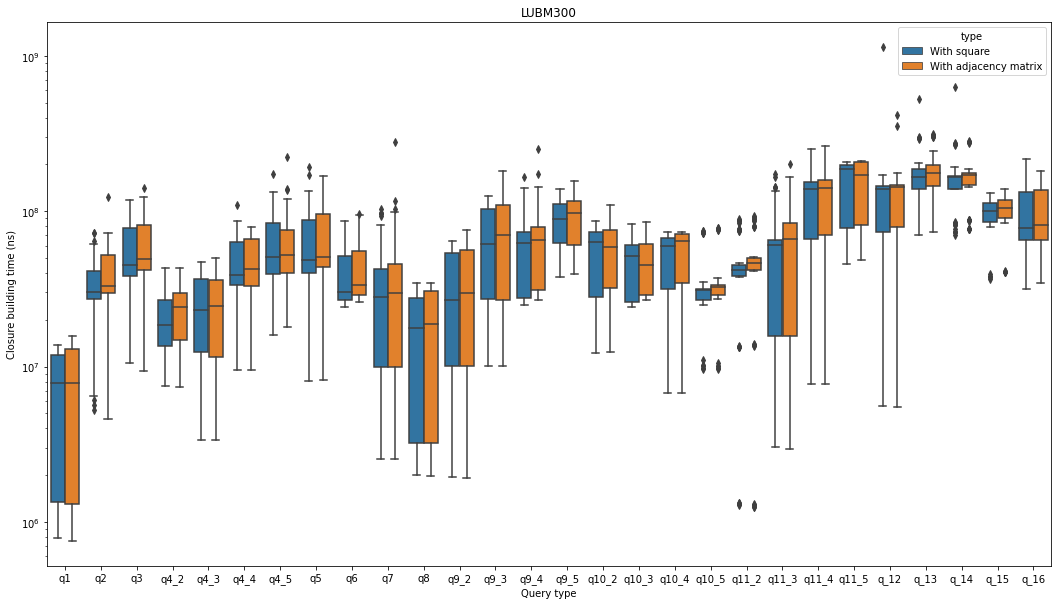

In [12]:
plot('LUBM300')

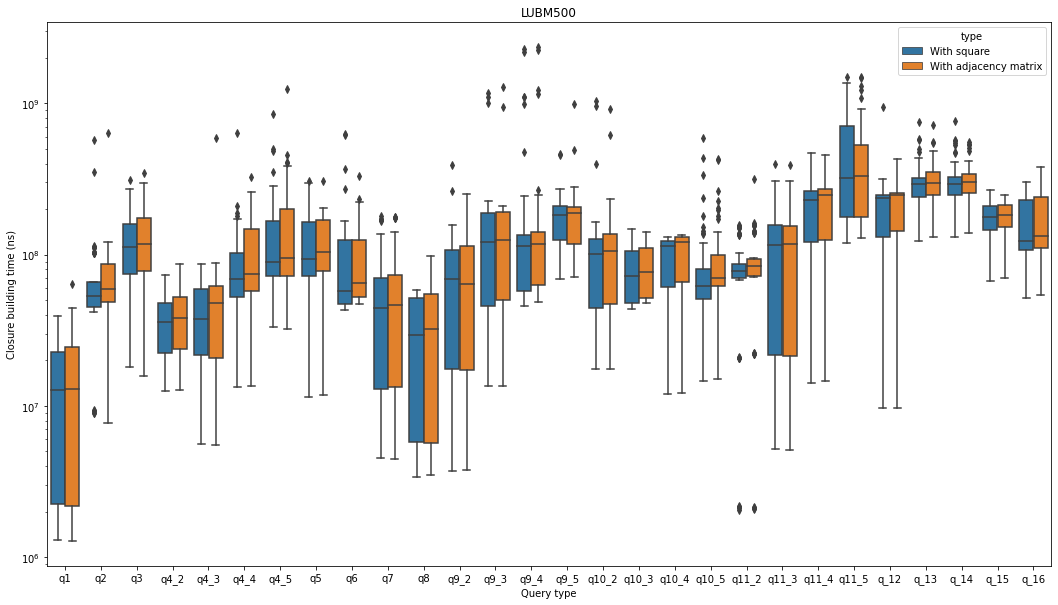

In [13]:
plot('LUBM500')

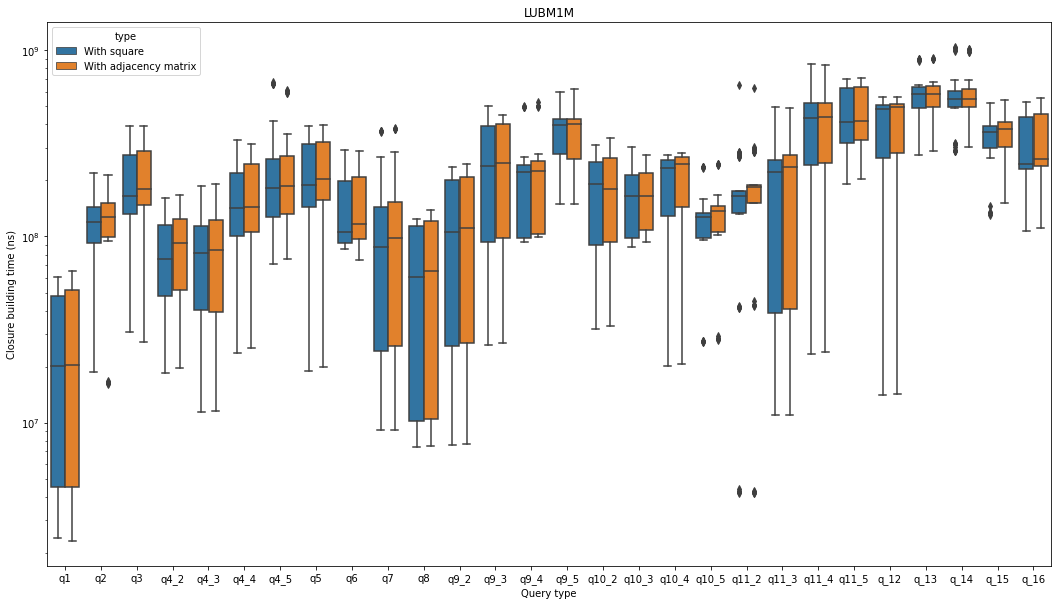

In [14]:
plot('LUBM1M')

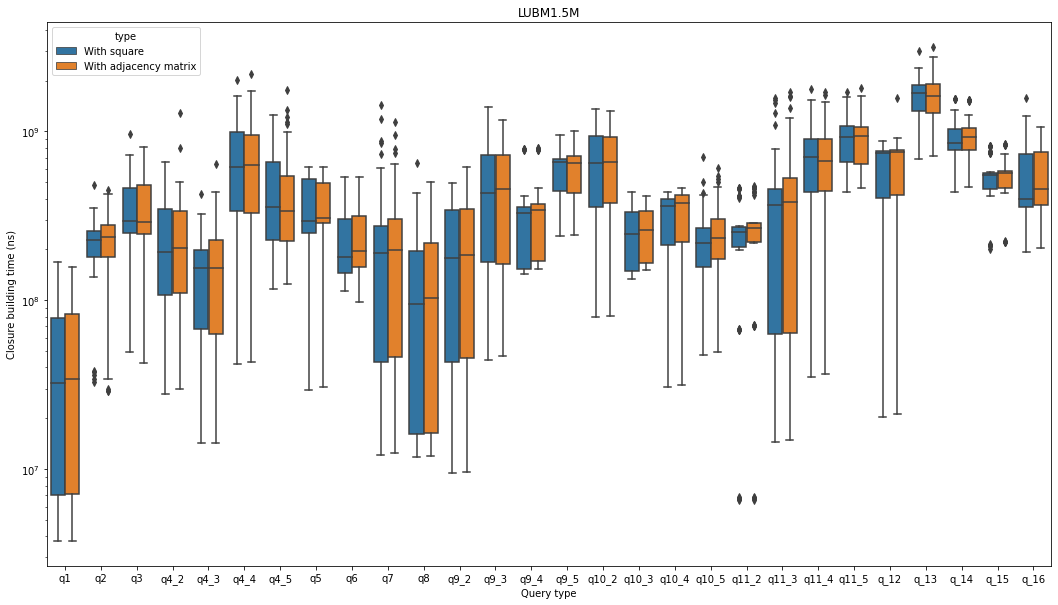

In [15]:
plot('LUBM1.5M')

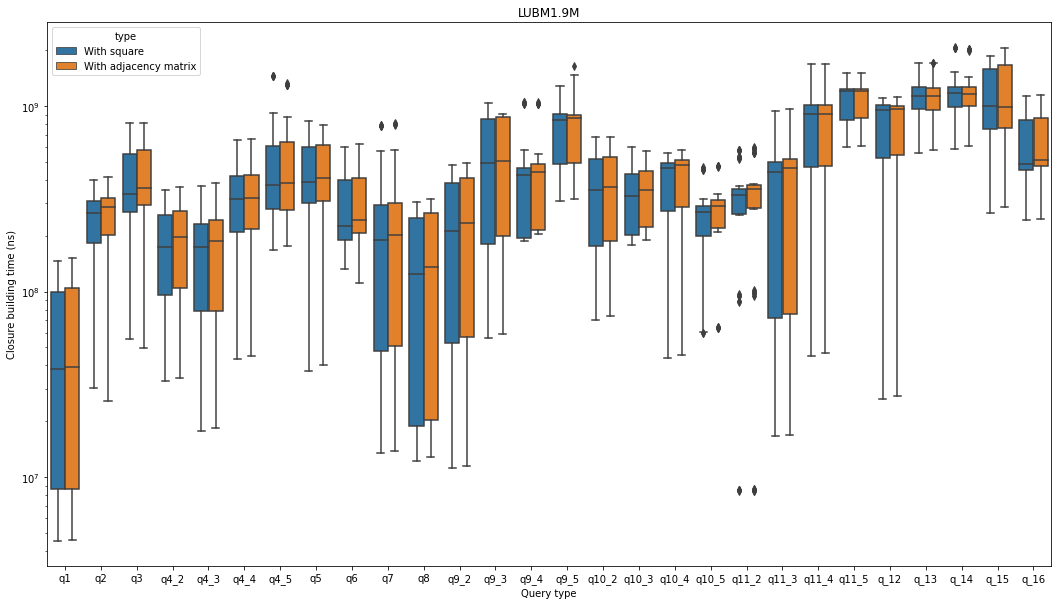

In [16]:
plot('LUBM1.9M')

## Вывод
Исходя из полученных результатов оба метода не имеют меж собой явных различий.

## Примечание
Есть подозрение, что на этих данных замыкание строится за 2-3 итерации, а то и вовсе за 1 (когда матрица смежности и есть замыкание). Если так, то вкупе с разрежённостью самого замыкания (а вместе с ним и всех промежуточных матриц) эти данные для сравнения не подходят, так как различия между двумя методами просто не могут успеть проявиться. С точность можно лишь сказать, что в случае одной итерации квадраты выигрывают, так как для метода с матрицей смежности создаётся дополнительная копия.